In [1]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm


from statsmodels.graphics.api import qqplot

In [2]:
dta = sm.datasets.sunspots.load_pandas().data

In [3]:
dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [4]:
dta.head()

,SUNACTIVITY
1700-12-31 00:00:00,5
1701-12-31 00:00:00,11
1702-12-31 00:00:00,16
1703-12-31 00:00:00,23
1704-12-31 00:00:00,36


In [5]:
arma_mod20 = sm.tsa.ARIMA(dta, (2,0,1)).fit()
print arma_mod20.params

const                49.749075
ar.L1.SUNACTIVITY     1.470739
ar.L2.SUNACTIVITY    -0.755121
ma.L1.SUNACTIVITY    -0.153691
dtype: float64


D:\Anaconda2\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


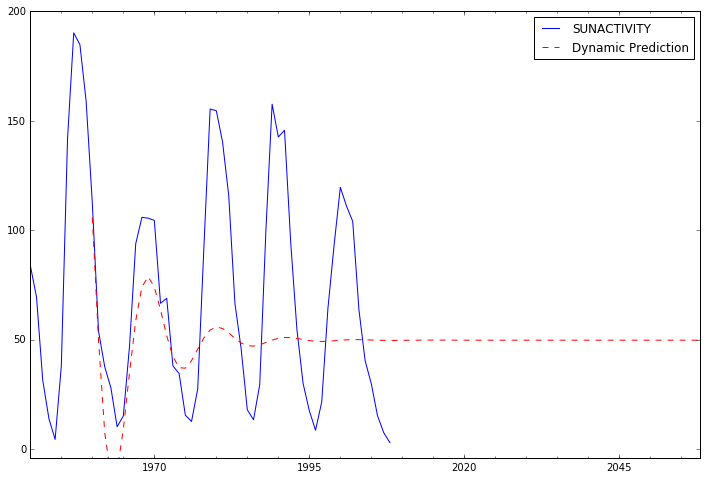

In [6]:
%matplotlib inline
predict_sunspots = arma_mod20.predict('1960', '2100', dynamic=True)
ax = dta.plot(figsize=(12,8))
ax = predict_sunspots.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 88.0, -4.0, 200.0));
plt.show()

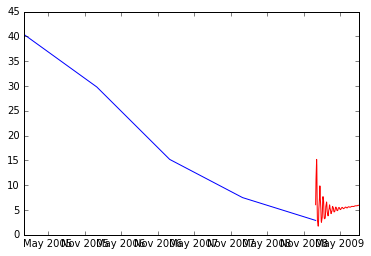

In [13]:
from arima import predictARIMA

%matplotlib inline

results = predictARIMA(dta, 150)
plt.plot(results, color='r');
plt.plot(dta.ix[-5:], color='b')

plt.show()